In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gc_utils import iteration_name, snapshot_name  # type: ignore
from scipy.interpolate import interp1d

In [2]:
mass_file = "/Users/z5114326/Documents/GitHub/gc_statistics/data/mass_data/m12i_gc_type_mass_data.hdf5"
mass_data = h5py.File(mass_file, "r")  # open processed data file

gc_mass_file = "/Users/z5114326/Documents/GitHub/gc_statistics/data/mass_data/m12i_gc_mass_data.hdf5"
gc_mass_data = h5py.File(gc_mass_file, "r")  # open processed data file

it = 0
it_id = iteration_name(it)

In [3]:
sim_dir = "/Users/z5114326/Documents/simulations/"
pub_data = sim_dir + "snapshot_times_public.txt"
pub_snaps = pd.read_table(pub_data, comment="#", header=None, sep=r"\s+")
pub_snaps.columns = [
    "index",
    "scale_factor",
    "redshift",
    "time_Gyr",
    "lookback_time_Gyr",
    "time_width_Myr",
]

In [4]:
plt_set = {
    "0": {"c": "r", "ls": "-", "label": "In-Situ Survive"},
    "1": {"c": "r", "ls": "--", "label": "in-Situ Destroyed"},
    "2": {"c": "b", "ls": "-", "label": "Ex-Situ Survive"},
    "3": {"c": "b", "ls": "--", "label": "Ex-Situ Destroyed Post Accretion"},
    "4": {"c": "b", "ls": ":", "label": "Ex-Situ Destroyed Pre Accretion"},
}

In [5]:
mass_loss_dict = {}

for gc_type in range(0, 5):
    gc_type = str(gc_type)

    mass_loss_dict[gc_type] = {}
    mass_loss_dict[gc_type]["list"] = []

for it_id in mass_data.keys():
    if "time" in it_id:
        continue

    for gc_type in range(0, 5):
        gc_type = str(gc_type)

        mass_sum = np.sum(mass_data[it_id][gc_type]["time"]["mass_loss_det"])
        mass_loss_dict[gc_type]["list"].append(mass_sum)

for gc_type in range(0, 5):
    gc_type = str(gc_type)

    mass_loss_dict[gc_type]["mean"] = np.mean(mass_loss_dict[gc_type]["list"])
    mass_loss_dict[gc_type]["std"] = np.std(mass_loss_dict[gc_type]["list"])

In [6]:
gc_mass_sum = 0
gc_std_sum = 0

for gc_type in range(0, 5):
    gc_type = str(gc_type)

    gc_mass_sum += mass_loss_dict[gc_type]["mean"]
    gc_std_sum += mass_loss_dict[gc_type]["std"]

In [7]:
gc_type = "3"
np.array([mass_loss_dict[gc_type]["mean"], mass_loss_dict[gc_type]["std"]])

array([1.59596867e+09, 2.26183131e+08])

In [8]:
gc_mass_sum * 10 ** (-10), gc_std_sum * 10 ** (-10)

(1.1873741909787068, 0.33508523185051)

In [9]:
pub_snaps

,index,scale_factor,redshift,time_Gyr,lookback_time_Gyr,time_width_Myr
0,20,0.090909,10.000000,0.487865,13.310882,12.6415
1,23,0.095454,9.476195,0.524880,13.273867,12.4377
2,26,0.100000,9.000000,0.562782,13.235965,12.7314
3,29,0.104762,8.545455,0.603415,13.195332,13.6484
4,33,0.111111,8.000001,0.659029,13.139718,14.0548
5,37,0.118056,7.470585,0.721681,13.077066,15.8391
6,41,0.125000,7.000000,0.786178,13.012568,16.2941
7,46,0.133117,6.512194,0.863829,12.934918,15.7217
8,52,0.142857,6.000002,0.960115,12.838632,16.2771
9,59,0.153968,5.494843,1.073930,12.724816,16.5120


# OVERALL PLOTS

In [27]:
def plotting_function(mass_data, plotting_vals: dict):
    # unpack variabel dictionary
    time_type, mass_type, type_lst, xlabel, ylabel, xscale, yscale, plt_error, cumsum, figsize, legend_loc = (
        plotting_vals.values()
    )

    #################################################
    plot_data_dict = {}
    for gc_type in type_lst:
        gc_type = str(gc_type)
        plot_data_dict[gc_type] = []

    for it_id in mass_data.keys():
        if "time" in it_id:
            continue

        for gc_type in plot_data_dict.keys():
            mass = mass_data[it_id][gc_type][time_type][mass_type][()]

            if cumsum:
                mass = np.cumsum(mass)

            plot_data_dict[gc_type].append(mass)

    plot_dict = {}
    for gc_type in plot_data_dict:
        plot_dict[gc_type] = {}

        mass_arr = np.array(plot_data_dict[gc_type])

        mass_avg = np.mean(mass_arr, axis=0)
        mass_std = np.std(mass_arr, axis=0)

        plot_dict[gc_type]["mean"] = mass_avg
        plot_dict[gc_type]["std"] = mass_std

    plt.figure(figsize=figsize)
    for gc_type in plot_dict:
        x = mass_data[time_type][()]
        y = plot_dict[gc_type]["mean"]
        y_err = plot_dict[gc_type]["std"]

        plt.plot(x, y, c=plt_set[gc_type]["c"], ls=plt_set[gc_type]["ls"], label=plt_set[gc_type]["label"])

        if plt_error:
            plt.fill_between(
                x,
                y - y_err,
                y + y_err,
                color=plt_set[gc_type]["c"],
                alpha=0.1,
            )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.xscale(xscale)
    plt.yscale(yscale)

    plt.xlim([np.min(x), np.max(x)])

    plt.legend(loc=legend_loc)

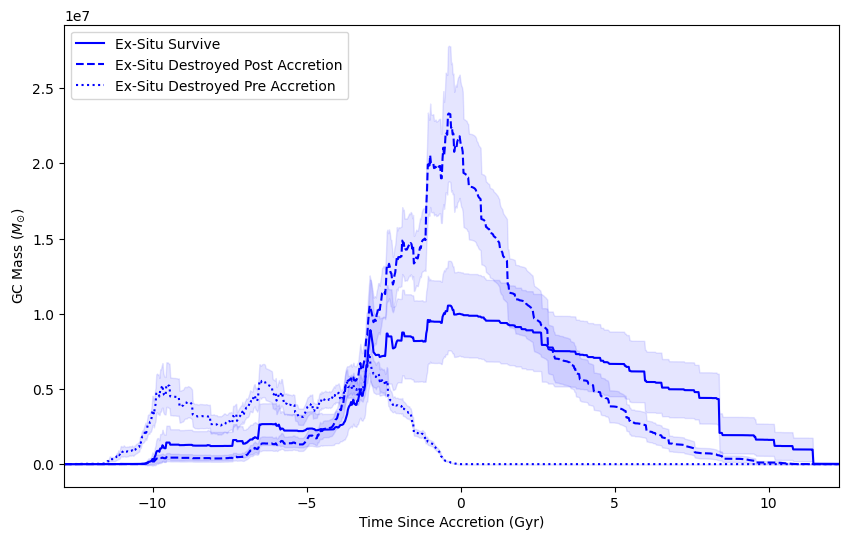

In [28]:
plotting_vals = {
    "time_type": "acc_time",
    "mass_type": "mass",
    "type_lst": [2, 3, 4],
    "xlabel": "Time Since Accretion (Gyr)",
    "ylabel": r"GC Mass ($M_{\odot}$)",
    "xscale": "linear",
    "yscale": "linear",
    "plt_error": True,
    "cumsum": False,
    "figsize": (10, 6),
    "legend_loc": "upper left",
}

plotting_function(mass_data, plotting_vals)

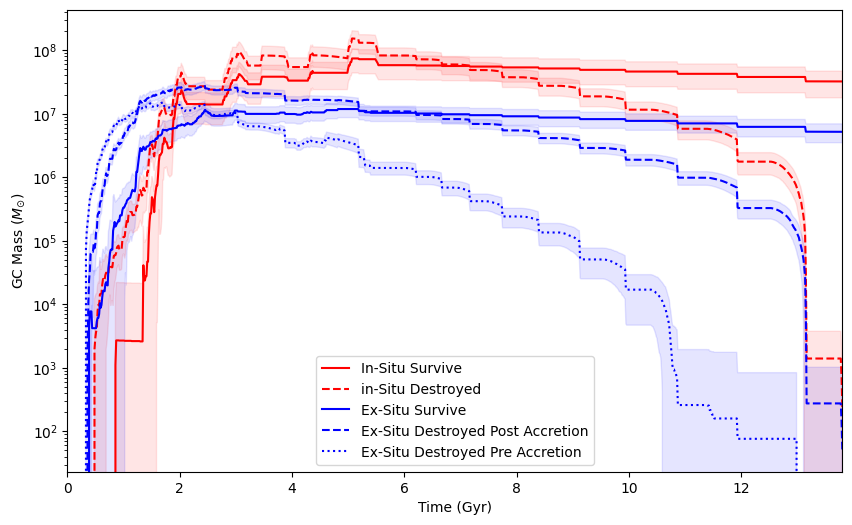

In [ ]:
plotting_vals = {
    "time_type": "time",
    "mass_type": "mass",
    "type_lst": [0, 1, 2, 3, 4],
    "xlabel": "Time (Gyr)",
    "ylabel": r"GC Mass ($M_{\odot}$)",
    "xscale": "linear",
    "yscale": "log",
    "plt_error": True,
    "cumsum": False,
    "figsize": (10, 6),
    "legend_loc": "lower center",
}

plotting_function(mass_data, plotting_vals)

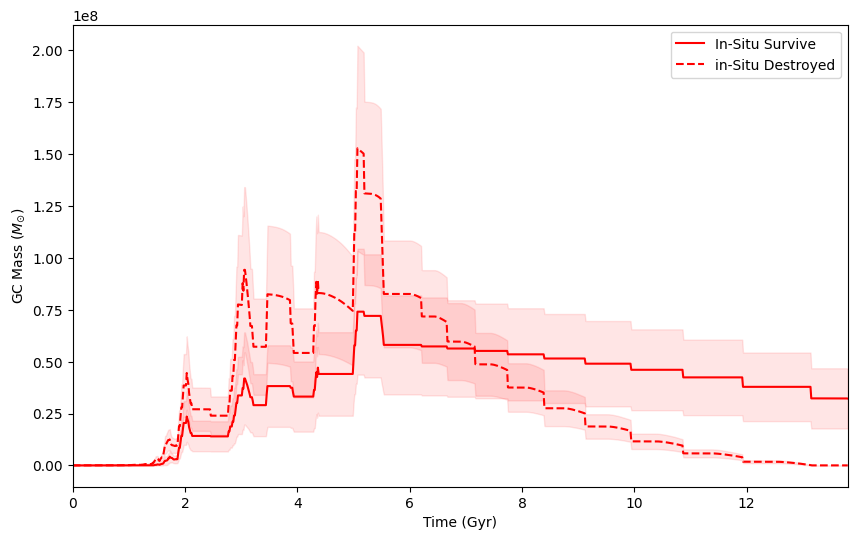

In [29]:
plotting_vals = {
    "time_type": "time",
    "mass_type": "mass",
    "type_lst": [0, 1],
    "xlabel": "Time (Gyr)",
    "ylabel": r"GC Mass ($M_{\odot}$)",
    "xscale": "linear",
    "yscale": "linear",
    "plt_error": True,
    "cumsum": False,
    "figsize": (10, 6),
    "legend_loc": "upper right",
}

plotting_function(mass_data, plotting_vals)

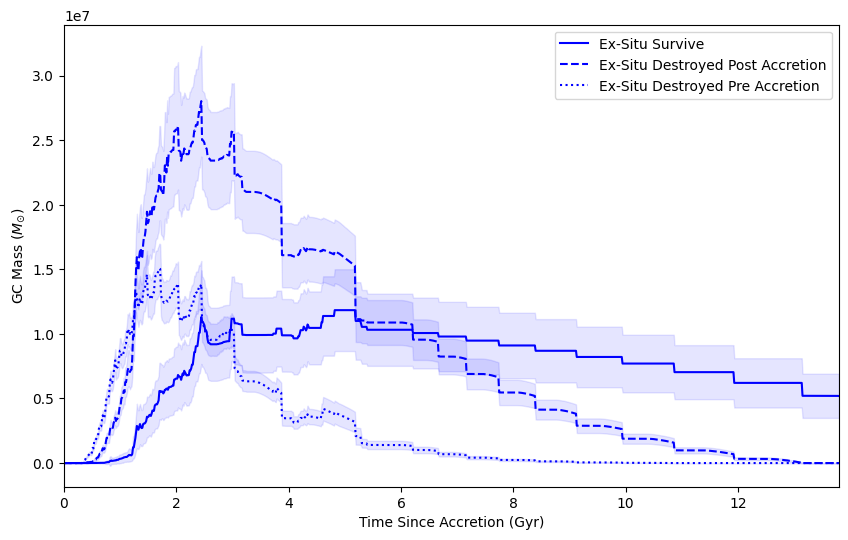

In [30]:
plotting_vals = {
    "time_type": "time",
    "mass_type": "mass",
    "type_lst": [2, 3, 4],
    "xlabel": "Time Since Accretion (Gyr)",
    "ylabel": r"GC Mass ($M_{\odot}$)",
    "xscale": "linear",
    "yscale": "linear",
    "plt_error": True,
    "cumsum": False,
    "figsize": (10, 6),
    "legend_loc": "upper right",
}

plotting_function(mass_data, plotting_vals)

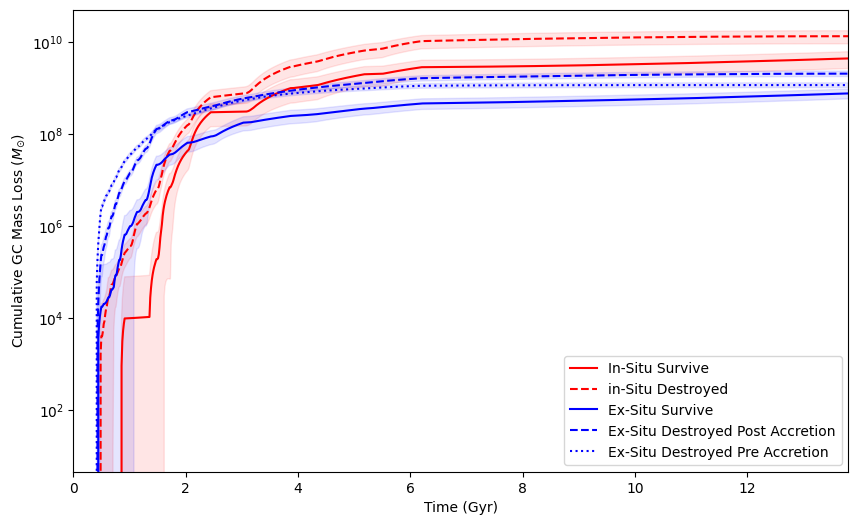

In [31]:
plotting_vals = {
    "time_type": "time",
    "mass_type": "mass_loss",
    "type_lst": [0, 1, 2, 3, 4],
    "xlabel": "Time (Gyr)",
    "ylabel": r"Cumulative GC Mass Loss ($M_{\odot}$)",
    "xscale": "linear",
    "yscale": "log",
    "plt_error": True,
    "cumsum": True,
    "figsize": (10, 6),
    "legend_loc": "lower right",
}

plotting_function(mass_data, plotting_vals)

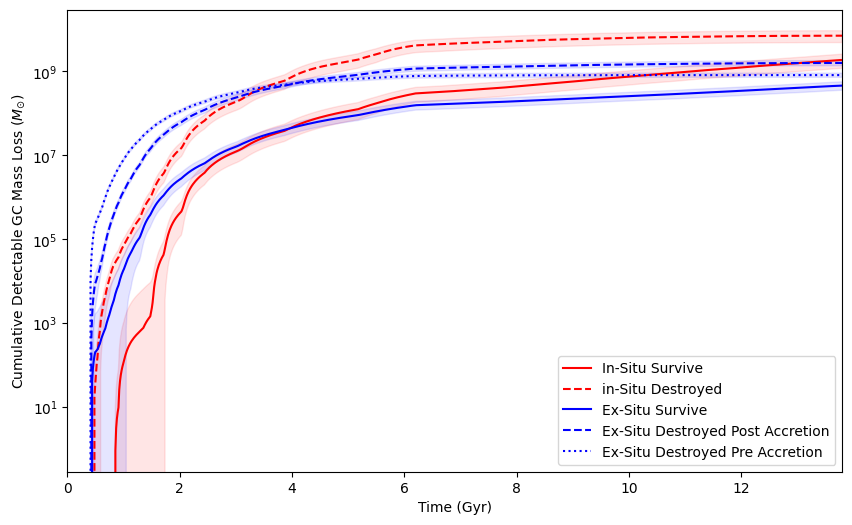

In [32]:
plotting_vals = {
    "time_type": "time",
    "mass_type": "mass_loss_det",
    "type_lst": [0, 1, 2, 3, 4],
    "xlabel": "Time (Gyr)",
    "ylabel": r"Cumulative Detectable GC Mass Loss ($M_{\odot}$)",
    "xscale": "linear",
    "yscale": "log",
    "plt_error": True,
    "cumsum": True,
    "figsize": (10, 6),
    "legend_loc": "lower right",
}

plotting_function(mass_data, plotting_vals)

# CDF PLOTS

## GET MASS AT FORMATION CDF

In [ ]:
# takes about 2.5 minutes to run

mass_form_dict = {}

for it_id in gc_mass_data.keys():
    mass_form_dict[it_id] = {}

    mass_form_dict[it_id]["0"] = []
    mass_form_dict[it_id]["1"] = []
    mass_form_dict[it_id]["2"] = []
    mass_form_dict[it_id]["3"] = []
    mass_form_dict[it_id]["4"] = []

    for gc_id in gc_mass_data[it_id].keys():
        gc_type = gc_mass_data[it_id][gc_id]["type_flag"][()]

        log_form_mass = gc_mass_data[it_id][gc_id]["log_mass"][0]
        form_mass = 10**log_form_mass

        mass_form_dict[it_id][str(gc_type)].append(form_mass)


it000
it001
it002
it003
it004
it005
it006
it007
it008
it009
it010
it011
it012
it013
it014
it015
it016
it017
it018
it019
it020
it021
it022
it023
it024
it025
it026
it027
it028
it029
it030
it031
it032
it033
it034
it035
it036
it037
it038
it039
it040
it041
it042
it043
it044
it045
it046
it047
it048
it049
it050
it051
it052
it053
it054
it055
it056
it057
it058
it059
it060
it061
it062
it063
it064
it065
it066
it067
it068
it069
it070
it071
it072
it073
it074
it075
it076
it077
it078
it079
it080
it081
it082
it083
it084
it085
it086
it087
it088
it089
it090
it091
it092
it093
it094
it095
it096
it097
it098
it099
it100


<Figure size 1000x600 with 0 Axes>

In [217]:
def safe_interpolate(x, y, mass_grid):
    interp_func = interp1d(x, y, kind="previous", bounds_error=False, fill_value=(0, 1))
    return interp_func(mass_grid)


def get_cdf(arr):
    return np.cumsum(arr) / np.sum(arr)

In [207]:
mass_form_grid = np.logspace(4, 7, 1000)  # Ensure logarithmic spacing

mass_cdf_0_lst = []
mass_cdf_1_lst = []
mass_cdf_2_lst = []
mass_cdf_3_lst = []
mass_cdf_4_lst = []

# # we want form time as we the 0th mass element will be the mass at formation
# time_type = "form_time"

mass_form_plot_dict = {}

for it_id in mass_form_dict.keys():
    mass_0 = np.sort(mass_form_dict[it_id]["0"])
    mass_1 = np.sort(mass_form_dict[it_id]["1"])

    mass_2 = np.sort(mass_form_dict[it_id]["2"])
    mass_3 = np.sort(mass_form_dict[it_id]["3"])
    mass_4 = np.sort(mass_form_dict[it_id]["4"])

    mass_cdf_0_lst.append(safe_interpolate(mass_0, get_cdf(mass_0), mass_form_grid))
    mass_cdf_1_lst.append(safe_interpolate(mass_1, get_cdf(mass_1), mass_form_grid))
    mass_cdf_2_lst.append(safe_interpolate(mass_2, get_cdf(mass_2), mass_form_grid))
    mass_cdf_3_lst.append(safe_interpolate(mass_3, get_cdf(mass_3), mass_form_grid))
    mass_cdf_4_lst.append(safe_interpolate(mass_4, get_cdf(mass_4), mass_form_grid))

mass_cdf_0_lst = np.array(mass_cdf_0_lst)
mass_cdf_1_lst = np.array(mass_cdf_1_lst)
mass_cdf_2_lst = np.array(mass_cdf_2_lst)
mass_cdf_3_lst = np.array(mass_cdf_3_lst)
mass_cdf_4_lst = np.array(mass_cdf_4_lst)

# get averages and errors
mass_form_plot_dict = {
    "0": {"mean": np.mean(mass_cdf_0_lst, axis=0), "std": np.std(mass_cdf_0_lst, axis=0)},
    "1": {"mean": np.mean(mass_cdf_1_lst, axis=0), "std": np.std(mass_cdf_1_lst, axis=0)},
    "2": {"mean": np.mean(mass_cdf_2_lst, axis=0), "std": np.std(mass_cdf_2_lst, axis=0)},
    "3": {"mean": np.mean(mass_cdf_3_lst, axis=0), "std": np.std(mass_cdf_3_lst, axis=0)},
    "4": {"mean": np.mean(mass_cdf_4_lst, axis=0), "std": np.std(mass_cdf_4_lst, axis=0)},
}

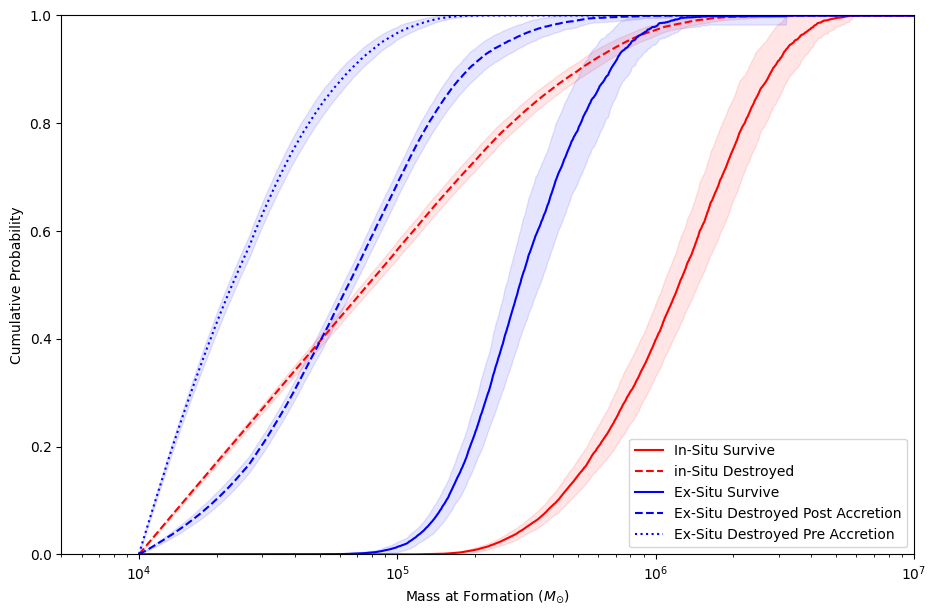

In [ ]:
plt.figure(figsize=(11, 7))

plt_error = True

for plot_key in mass_form_plot_dict.keys():
    grid = mass_form_grid
    cdf = mass_form_plot_dict[plot_key]["mean"]
    err = mass_form_plot_dict[plot_key]["std"]

    plt.plot(
        grid,
        cdf,
        c=plt_set[plot_key]["c"],
        ls=plt_set[plot_key]["ls"],
        label=plt_set[plot_key]["label"],
    )

    if plt_error:
        plt.fill_between(
            mass_form_grid,
            cdf - err,
            cdf + err,
            color=plt_set[plot_key]["c"],
            alpha=0.1,
        )


plt.xlabel(r"Mass at Formation ($M_{\odot}$)")
plt.ylabel("Cumulative Probability")

plt.xscale("log")
plt.xlim(5 * 10**3, 10**7)
plt.ylim(0, 1)
plt.legend(loc="lower right")

## GET TIME OF FORMATION CDF

In [221]:
# takes about 2.5 minutes to run

time_form_dict = {}

for it_id in gc_mass_data.keys():
    time_form_dict[it_id] = {}

    time_form_dict[it_id]["0"] = []
    time_form_dict[it_id]["1"] = []
    time_form_dict[it_id]["2"] = []
    time_form_dict[it_id]["3"] = []
    time_form_dict[it_id]["4"] = []

    for gc_id in gc_mass_data[it_id].keys():
        gc_type = gc_mass_data[it_id][gc_id]["type_flag"][()]

        form_time = gc_mass_data[it_id][gc_id]["time"][0]

        time_form_dict[it_id][str(gc_type)].append(form_time)


In [233]:
time_form_grid = np.linspace(0, 6, 1000)  # Ensure logarithmic spacing

time_cdf_0_lst = []
time_cdf_1_lst = []
time_cdf_2_lst = []
time_cdf_3_lst = []
time_cdf_4_lst = []

# # we want form time as we the 0th mass element will be the mass at formation
# time_type = "form_time"

time_form_plot_dict = {}

for it_id in time_form_dict.keys():
    time_0 = np.sort(time_form_dict[it_id]["0"])
    time_1 = np.sort(time_form_dict[it_id]["1"])
    time_2 = np.sort(time_form_dict[it_id]["2"])
    time_3 = np.sort(time_form_dict[it_id]["3"])
    time_4 = np.sort(time_form_dict[it_id]["4"])

    time_cdf_0_lst.append(safe_interpolate(time_0, get_cdf(time_0), time_form_grid))
    time_cdf_1_lst.append(safe_interpolate(time_1, get_cdf(time_1), time_form_grid))
    time_cdf_2_lst.append(safe_interpolate(time_2, get_cdf(time_2), time_form_grid))
    time_cdf_3_lst.append(safe_interpolate(time_3, get_cdf(time_3), time_form_grid))
    time_cdf_4_lst.append(safe_interpolate(time_4, get_cdf(time_4), time_form_grid))

time_cdf_0_lst = np.array(time_cdf_0_lst)
time_cdf_1_lst = np.array(time_cdf_1_lst)
time_cdf_2_lst = np.array(time_cdf_2_lst)
time_cdf_3_lst = np.array(time_cdf_3_lst)
time_cdf_4_lst = np.array(time_cdf_4_lst)

# get averages and errors
time_form_plot_dict = {
    "0": {"mean": np.mean(time_cdf_0_lst, axis=0), "std": np.std(time_cdf_0_lst, axis=0)},
    "1": {"mean": np.mean(time_cdf_1_lst, axis=0), "std": np.std(time_cdf_1_lst, axis=0)},
    "2": {"mean": np.mean(time_cdf_2_lst, axis=0), "std": np.std(time_cdf_2_lst, axis=0)},
    "3": {"mean": np.mean(time_cdf_3_lst, axis=0), "std": np.std(time_cdf_3_lst, axis=0)},
    "4": {"mean": np.mean(time_cdf_4_lst, axis=0), "std": np.std(time_cdf_4_lst, axis=0)},
}

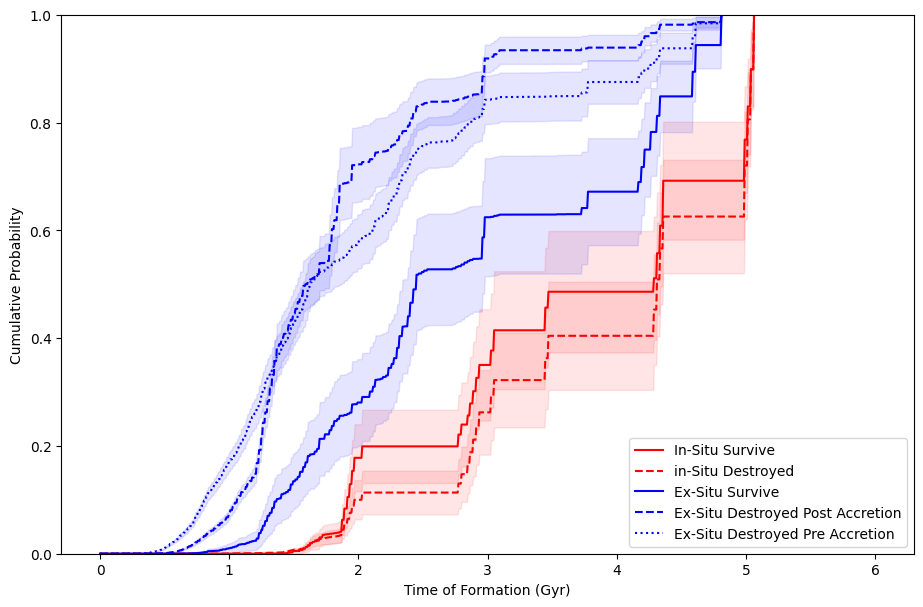

In [ ]:
plt.figure(figsize=(11, 7))

plt_error = True

for plot_key in time_form_plot_dict.keys():
    grid = time_form_grid
    cdf = time_form_plot_dict[plot_key]["mean"]
    err = time_form_plot_dict[plot_key]["std"]

    plt.plot(
        grid,
        cdf,
        c=plt_set[plot_key]["c"],
        ls=plt_set[plot_key]["ls"],
        label=plt_set[plot_key]["label"],
    )

    if plt_error:
        plt.fill_between(
            time_form_grid,
            cdf - err,
            cdf + err,
            color=plt_set[plot_key]["c"],
            alpha=0.1,
        )


plt.xlabel("Time of Formation (Gyr)")
plt.ylabel("Cumulative Probability")

# plt.xscale("log")
# plt.xlim(5 * 10**3, 10**7)
plt.ylim(0, 1)
plt.legend(loc="lower right")

## GET TIME OF DESTRUCTION CDF

In [238]:
# takes about 2.5 minutes to run

time_des_dict = {}

for it_id in gc_mass_data.keys():
    time_des_dict[it_id] = {}

    time_des_dict[it_id]["1"] = []
    time_des_dict[it_id]["3"] = []
    time_des_dict[it_id]["4"] = []

    for gc_id in gc_mass_data[it_id].keys():
        gc_type = gc_mass_data[it_id][gc_id]["type_flag"][()]

        if (gc_type == 0) or (gc_type == 2):
            continue

        des_time = gc_mass_data[it_id][gc_id]["time"][-1]

        time_des_dict[it_id][str(gc_type)].append(des_time)

In [240]:
time_des_grid = np.linspace(0, 14, 1000)  # Ensure logarithmic spacing

time_cdf_1_lst = []
time_cdf_3_lst = []
time_cdf_4_lst = []

# # we want form time as we the 0th mass element will be the mass at formation
# time_type = "form_time"

for it_id in time_des_dict.keys():
    time_1 = np.sort(time_des_dict[it_id]["1"])
    time_3 = np.sort(time_des_dict[it_id]["3"])
    time_4 = np.sort(time_des_dict[it_id]["4"])

    time_cdf_1_lst.append(safe_interpolate(time_1, get_cdf(time_1), time_des_grid))
    time_cdf_3_lst.append(safe_interpolate(time_3, get_cdf(time_3), time_des_grid))
    time_cdf_4_lst.append(safe_interpolate(time_4, get_cdf(time_4), time_des_grid))

time_cdf_1_lst = np.array(time_cdf_1_lst)
time_cdf_3_lst = np.array(time_cdf_3_lst)
time_cdf_4_lst = np.array(time_cdf_4_lst)

# get averages and errors
time_des_plot_dict = {
    "1": {"mean": np.mean(time_cdf_1_lst, axis=0), "std": np.std(time_cdf_1_lst, axis=0)},
    "3": {"mean": np.mean(time_cdf_3_lst, axis=0), "std": np.std(time_cdf_3_lst, axis=0)},
    "4": {"mean": np.mean(time_cdf_4_lst, axis=0), "std": np.std(time_cdf_4_lst, axis=0)},
}

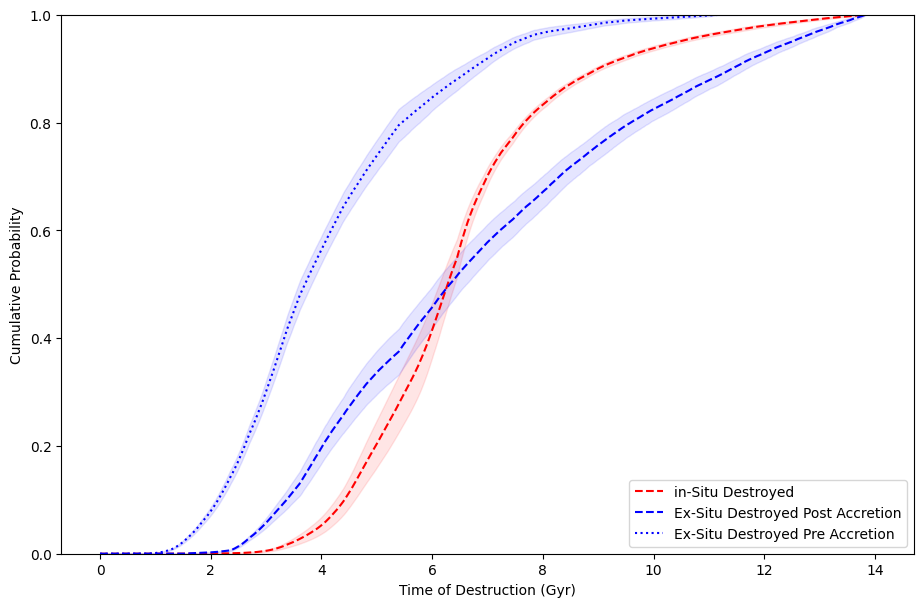

In [ ]:
plt.figure(figsize=(11, 7))

plt_error = True

for plot_key in time_des_plot_dict.keys():
    grid = time_des_grid
    cdf = time_des_plot_dict[plot_key]["mean"]
    err = time_des_plot_dict[plot_key]["std"]

    plt.plot(
        grid,
        cdf,
        c=plt_set[plot_key]["c"],
        ls=plt_set[plot_key]["ls"],
        label=plt_set[plot_key]["label"],
    )

    if plt_error:
        plt.fill_between(
            time_des_grid,
            cdf - err,
            cdf + err,
            color=plt_set[plot_key]["c"],
            alpha=0.1,
        )


plt.xlabel("Time of Destruction (Gyr)")
plt.ylabel("Cumulative Probability")

# plt.xscale("log")
# plt.xlim(5 * 10**3, 10**7)
plt.ylim(0, 1)
plt.legend(loc="lower right")

## GET TIME OF DESTRUCTION IN RELATION TO FORMATION TIME

In [396]:
# takes about 2.5 minutes to run

time_des_dict = {}

for it_id in gc_mass_data.keys():
    time_des_dict[it_id] = {}

    time_des_dict[it_id]["1"] = []
    time_des_dict[it_id]["3"] = []
    time_des_dict[it_id]["4"] = []

    for gc_id in gc_mass_data[it_id].keys():
        gc_type = gc_mass_data[it_id][gc_id]["type_flag"][()]

        if (gc_type == 0) or (gc_type == 2):
            continue

        des_time = gc_mass_data[it_id][gc_id]["form_time"][-1]

        time_des_dict[it_id][str(gc_type)].append(des_time)

In [399]:
time_des_grid = np.linspace(0, 14, 1000)  # Ensure logarithmic spacing

time_cdf_1_lst = []
time_cdf_3_lst = []
time_cdf_4_lst = []

# # we want form time as we the 0th mass element will be the mass at formation
# time_type = "form_time"

for it_id in time_des_dict.keys():
    time_1 = np.sort(time_des_dict[it_id]["1"])
    time_3 = np.sort(time_des_dict[it_id]["3"])
    time_4 = np.sort(time_des_dict[it_id]["4"])

    time_cdf_1_lst.append(safe_interpolate(time_1, get_cdf(time_1), time_des_grid))
    time_cdf_3_lst.append(safe_interpolate(time_3, get_cdf(time_3), time_des_grid))
    time_cdf_4_lst.append(safe_interpolate(time_4, get_cdf(time_4), time_des_grid))

time_cdf_1_lst = np.array(time_cdf_1_lst)
time_cdf_3_lst = np.array(time_cdf_3_lst)
time_cdf_4_lst = np.array(time_cdf_4_lst)

# get averages and errors
time_des_plot_dict = {
    "1": {"mean": np.mean(time_cdf_1_lst, axis=0), "std": np.std(time_cdf_1_lst, axis=0)},
    "3": {"mean": np.mean(time_cdf_3_lst, axis=0), "std": np.std(time_cdf_3_lst, axis=0)},
    "4": {"mean": np.mean(time_cdf_4_lst, axis=0), "std": np.std(time_cdf_4_lst, axis=0)},
}

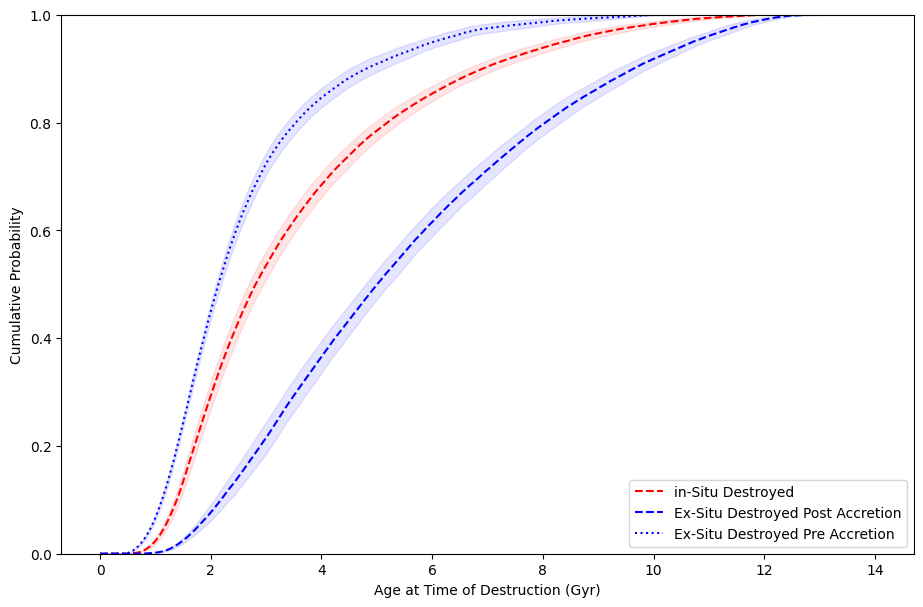

In [400]:
plt.figure(figsize=(11, 7))

plt_error = True

for plot_key in time_des_plot_dict.keys():
    grid = time_des_grid
    cdf = time_des_plot_dict[plot_key]["mean"]
    err = time_des_plot_dict[plot_key]["std"]

    plt.plot(
        grid,
        cdf,
        c=plt_set[plot_key]["c"],
        ls=plt_set[plot_key]["ls"],
        label=plt_set[plot_key]["label"],
    )

    if plt_error:
        plt.fill_between(
            time_des_grid,
            cdf - err,
            cdf + err,
            color=plt_set[plot_key]["c"],
            alpha=0.1,
        )


plt.xlabel("Age at Time of Destruction (Gyr)")
plt.ylabel("Cumulative Probability")

# plt.xscale("log")
# plt.xlim(5 * 10**3, 10**7)
plt.ylim(0, 1)
plt.legend(loc="lower right")

## GET TIME OF DESTRUCTION IN RELATION TO ACCRETION TIME

In [401]:
# takes about 2.5 minutes to run

time_des_dict = {}

for it_id in gc_mass_data.keys():
    time_des_dict[it_id] = {}

    time_des_dict[it_id]["3"] = []
    time_des_dict[it_id]["4"] = []

    for gc_id in gc_mass_data[it_id].keys():
        gc_type = gc_mass_data[it_id][gc_id]["type_flag"][()]

        if (gc_type == 0) or (gc_type == 1) or (gc_type == 2):
            continue

        des_time = gc_mass_data[it_id][gc_id]["acc_time"][-1]

        time_des_dict[it_id][str(gc_type)].append(des_time)

In [402]:
time_des_grid = np.linspace(-12, 12, 1000)  # Ensure logarithmic spacing

time_cdf_1_lst = []
time_cdf_3_lst = []
time_cdf_4_lst = []

# # we want form time as we the 0th mass element will be the mass at formation
# time_type = "form_time"

for it_id in time_des_dict.keys():
    time_3 = np.sort(time_des_dict[it_id]["3"])
    time_4 = np.sort(time_des_dict[it_id]["4"])

    time_cdf_3_lst.append(safe_interpolate(time_3, get_cdf(time_3), time_des_grid))
    time_cdf_4_lst.append(safe_interpolate(time_4, get_cdf(time_4), time_des_grid))

time_cdf_3_lst = np.array(time_cdf_3_lst)
time_cdf_4_lst = np.array(time_cdf_4_lst)

# get averages and errors
time_des_plot_dict = {
    "3": {"mean": np.mean(time_cdf_3_lst, axis=0), "std": np.std(time_cdf_3_lst, axis=0)},
    "4": {"mean": np.mean(time_cdf_4_lst, axis=0), "std": np.std(time_cdf_4_lst, axis=0)},
}

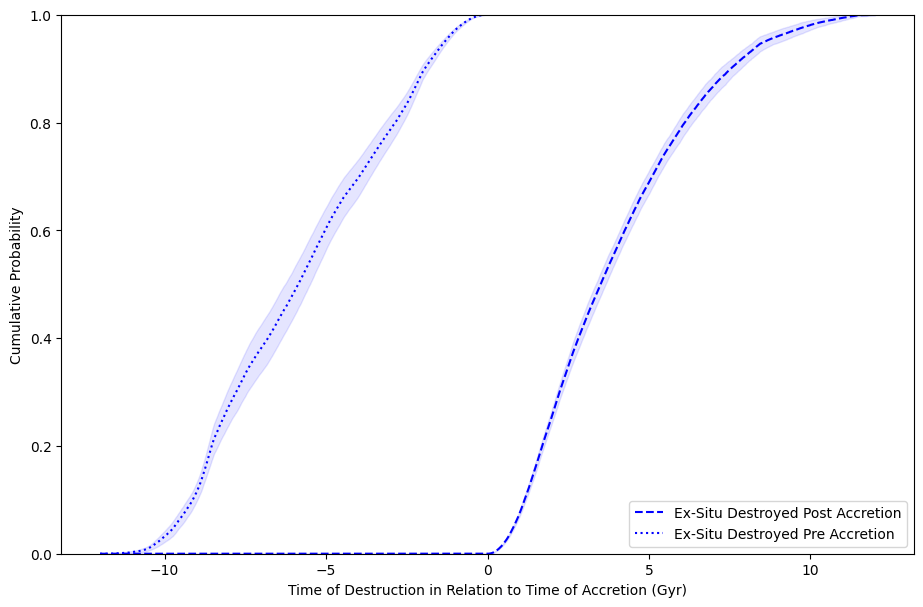

In [403]:
plt.figure(figsize=(11, 7))

plt_error = True

for plot_key in time_des_plot_dict.keys():
    grid = time_des_grid
    cdf = time_des_plot_dict[plot_key]["mean"]
    err = time_des_plot_dict[plot_key]["std"]

    plt.plot(
        grid,
        cdf,
        c=plt_set[plot_key]["c"],
        ls=plt_set[plot_key]["ls"],
        label=plt_set[plot_key]["label"],
    )

    if plt_error:
        plt.fill_between(
            time_des_grid,
            cdf - err,
            cdf + err,
            color=plt_set[plot_key]["c"],
            alpha=0.1,
        )


plt.xlabel("Time of Destruction in Relation to Time of Accretion (Gyr)")
plt.ylabel("Cumulative Probability")

# plt.xscale("log")
# plt.xlim(5 * 10**3, 10**7)
plt.ylim(0, 1)
plt.legend(loc="lower right")

## GET TIME OF FORMATION IN RELATION TO ACCRETION TIME

In [446]:
# takes about 2.5 minutes to run

time_form_dict = {}

for it_id in gc_mass_data.keys():
    time_form_dict[it_id] = {}

    time_form_dict[it_id]["2"] = []
    time_form_dict[it_id]["3"] = []
    time_form_dict[it_id]["4"] = []

    for gc_id in gc_mass_data[it_id].keys():
        gc_type = gc_mass_data[it_id][gc_id]["type_flag"][()]

        if (gc_type == 0) or (gc_type == 1):
            continue

        form_time = gc_mass_data[it_id][gc_id]["acc_time"][0]

        time_form_dict[it_id][str(gc_type)].append(form_time)

In [447]:
time_form_grid = np.linspace(-12, 0, 1000)  # Ensure logarithmic spacing

time_cdf_2_lst = []
time_cdf_3_lst = []
time_cdf_4_lst = []

# # we want form time as we the 0th mass element will be the mass at formation
# time_type = "form_time"

for it_id in time_form_dict.keys():
    time_2 = np.sort(time_form_dict[it_id]["2"])
    time_3 = np.sort(time_form_dict[it_id]["3"])
    time_4 = np.sort(time_form_dict[it_id]["4"])

    time_cdf_2_lst.append(safe_interpolate(time_2, get_cdf(time_2), time_form_grid))
    time_cdf_3_lst.append(safe_interpolate(time_3, get_cdf(time_3), time_form_grid))
    time_cdf_4_lst.append(safe_interpolate(time_4, get_cdf(time_4), time_form_grid))

time_cdf_2_lst = np.array(time_cdf_2_lst)
time_cdf_3_lst = np.array(time_cdf_3_lst)
time_cdf_4_lst = np.array(time_cdf_4_lst)

# get averages and errors
time_form_plot_dict = {
    "2": {"mean": np.mean(time_cdf_2_lst, axis=0), "std": np.std(time_cdf_2_lst, axis=0)},
    "3": {"mean": np.mean(time_cdf_3_lst, axis=0), "std": np.std(time_cdf_3_lst, axis=0)},
    "4": {"mean": np.mean(time_cdf_4_lst, axis=0), "std": np.std(time_cdf_4_lst, axis=0)},
}

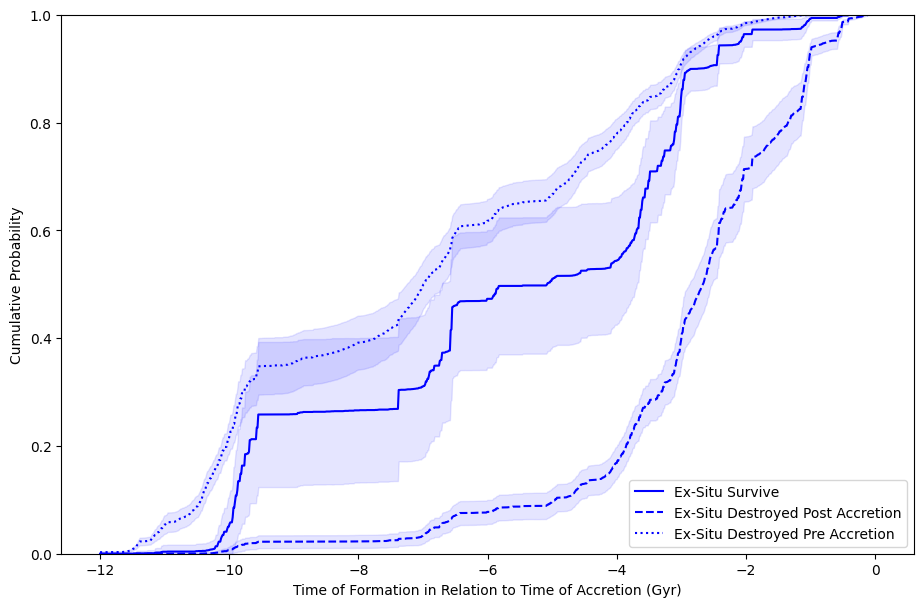

In [448]:
plt.figure(figsize=(11, 7))

plt_error = True

for plot_key in time_form_plot_dict.keys():
    grid = time_form_grid
    cdf = time_form_plot_dict[plot_key]["mean"]
    err = time_form_plot_dict[plot_key]["std"]

    plt.plot(
        grid,
        cdf,
        c=plt_set[plot_key]["c"],
        ls=plt_set[plot_key]["ls"],
        label=plt_set[plot_key]["label"],
    )

    if plt_error:
        plt.fill_between(
            time_form_grid,
            cdf - err,
            cdf + err,
            color=plt_set[plot_key]["c"],
            alpha=0.1,
        )


plt.xlabel("Time of Formation in Relation to Time of Accretion (Gyr)")
plt.ylabel("Cumulative Probability")

# plt.xscale("log")
# plt.xlim(5 * 10**3, 10**7)
plt.ylim(0, 1)
plt.legend(loc="lower right")

## GET TIME OF ACCRETION

In [439]:
# takes about 2.5 minutes to run

sim = "m12i"
proc_file = sim_dir + sim + "/" + sim + "_processed.hdf5"
proc_data = h5py.File(proc_file, "r")  # open processed data file

time_acc_dict = {}

for it_id in gc_mass_data.keys():
    time_acc_dict[it_id] = {}

    time_acc_dict[it_id]["2"] = []
    time_acc_dict[it_id]["3"] = []
    time_acc_dict[it_id]["4"] = []

    src_data = proc_data[it_id]["source"]
    ana_flag = np.array(src_data["analyse_flag"]) == 1

    for gc_id in gc_mass_data[it_id].keys():
        gc_type = gc_mass_data[it_id][gc_id]["type_flag"][()]

        if (gc_type == 0) or (gc_type == 1):
            continue

        idx = np.where(np.array(src_data["gc_id"][ana_flag]) == int(gc_id))[0][0]
        acc_time = src_data["t_acc"][ana_flag][idx]

        time_acc_dict[it_id][str(gc_type)].append(acc_time)

In [444]:
time_acc_grid = np.linspace(0, 14, 1000)  # Ensure logarithmic spacing

time_cdf_2_lst = []
time_cdf_3_lst = []
time_cdf_4_lst = []

# # we want form time as we the 0th mass element will be the mass at formation
# time_type = "form_time"

for it_id in time_acc_dict.keys():
    time_2 = np.sort(time_acc_dict[it_id]["2"])
    time_3 = np.sort(time_acc_dict[it_id]["3"])
    time_4 = np.sort(time_acc_dict[it_id]["4"])

    time_cdf_2_lst.append(safe_interpolate(time_2, get_cdf(time_2), time_acc_grid))
    time_cdf_3_lst.append(safe_interpolate(time_3, get_cdf(time_3), time_acc_grid))
    time_cdf_4_lst.append(safe_interpolate(time_4, get_cdf(time_4), time_acc_grid))

time_cdf_2_lst = np.array(time_cdf_2_lst)
time_cdf_3_lst = np.array(time_cdf_3_lst)
time_cdf_4_lst = np.array(time_cdf_4_lst)

# get averages and errors
time_acc_plot_dict = {
    "2": {"mean": np.mean(time_cdf_2_lst, axis=0), "std": np.std(time_cdf_2_lst, axis=0)},
    "3": {"mean": np.mean(time_cdf_3_lst, axis=0), "std": np.std(time_cdf_3_lst, axis=0)},
    "4": {"mean": np.mean(time_cdf_4_lst, axis=0), "std": np.std(time_cdf_4_lst, axis=0)},
}

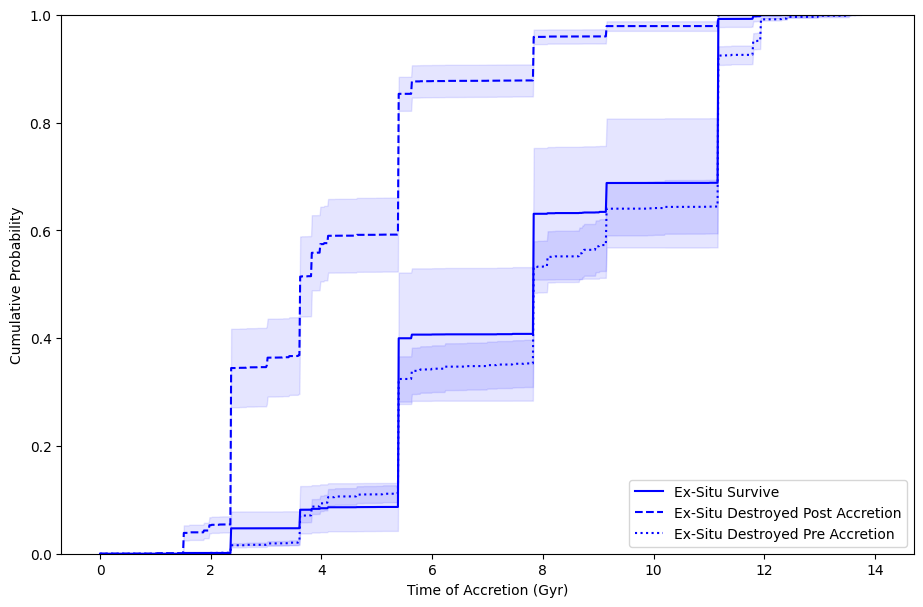

In [445]:
plt.figure(figsize=(11, 7))

plt_error = True

for plot_key in time_acc_plot_dict.keys():
    grid = time_acc_grid
    cdf = time_acc_plot_dict[plot_key]["mean"]
    err = time_acc_plot_dict[plot_key]["std"]

    plt.plot(
        grid,
        cdf,
        c=plt_set[plot_key]["c"],
        ls=plt_set[plot_key]["ls"],
        label=plt_set[plot_key]["label"],
    )

    if plt_error:
        plt.fill_between(
            time_acc_grid,
            cdf - err,
            cdf + err,
            color=plt_set[plot_key]["c"],
            alpha=0.1,
        )


plt.xlabel("Time of Accretion (Gyr)")
plt.ylabel("Cumulative Probability")

# plt.xscale("log")
# plt.xlim(5 * 10**3, 10**7)
plt.ylim(0, 1)
plt.legend(loc="lower right")

In [426]:
src_data = proc_data["it000"]["source"]
ana_flag = np.array(src_data["analyse_flag"]) == 1
# group_id = np.array(src_data["group_id"]) < -1

np.min(proc_data["it000"]["source"]["t_acc"][ana_flag])

# plt.hist(proc_data["it000"]["source"]["t_acc"][ana_flag & group_id])

-1.0

## GET AGE AT TIME OF ACCRETION CDF

In [296]:
# takes about 2.5 minutes to run

time_age_dict = {}

for it_id in gc_mass_data.keys():
    time_age_dict[it_id] = {}

    time_age_dict[it_id]["2"] = []
    time_age_dict[it_id]["3"] = []
    time_age_dict[it_id]["4"] = []

    for gc_id in gc_mass_data[it_id].keys():
        gc_type = gc_mass_data[it_id][gc_id]["type_flag"][()]

        if (gc_type == 0) or (gc_type == 1):
            continue

        # first element of acc time is t_form - t_acc so the negative of this is age at accretion
        # group 4 will have negative ages
        age_time = -gc_mass_data[it_id][gc_id]["acc_time"][0]

        time_age_dict[it_id][str(gc_type)].append(age_time)

In [303]:
time_age_grid = np.linspace(0, 13.8, 1000)  # Ensure logarithmic spacing

time_cdf_2_lst = []
time_cdf_3_lst = []
time_cdf_4_lst = []

# # we want form time as we the 0th mass element will be the mass at formation
# time_type = "form_time"

for it_id in time_age_dict.keys():
    time_2 = np.sort(time_age_dict[it_id]["2"])
    time_3 = np.sort(time_age_dict[it_id]["3"])
    time_4 = np.sort(time_age_dict[it_id]["4"])

    time_cdf_2_lst.append(safe_interpolate(time_2, get_cdf(time_2), time_age_grid))
    time_cdf_3_lst.append(safe_interpolate(time_3, get_cdf(time_3), time_age_grid))
    time_cdf_4_lst.append(safe_interpolate(time_4, get_cdf(time_4), time_age_grid))

time_cdf_3_lst = np.array(time_cdf_3_lst)
time_cdf_4_lst = np.array(time_cdf_4_lst)

# get averages and errors
time_age_plot_dict = {
    "2": {"mean": np.mean(time_cdf_2_lst, axis=0), "std": np.std(time_cdf_2_lst, axis=0)},
    "3": {"mean": np.mean(time_cdf_3_lst, axis=0), "std": np.std(time_cdf_3_lst, axis=0)},
    "4": {"mean": np.mean(time_cdf_4_lst, axis=0), "std": np.std(time_cdf_4_lst, axis=0)},
}

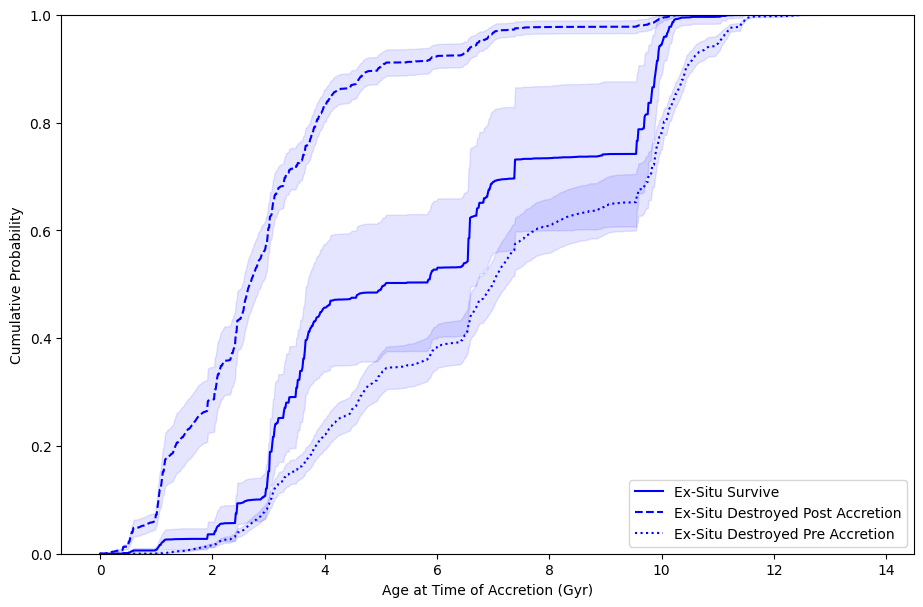

In [ ]:
plt.figure(figsize=(11, 7))

plt_error = True

for plot_key in time_age_plot_dict.keys():
    grid = time_age_grid
    cdf = time_age_plot_dict[plot_key]["mean"]
    err = time_age_plot_dict[plot_key]["std"]

    plt.plot(
        grid,
        cdf,
        c=plt_set[plot_key]["c"],
        ls=plt_set[plot_key]["ls"],
        label=plt_set[plot_key]["label"],
    )

    if plt_error:
        plt.fill_between(
            time_age_grid,
            cdf - err,
            cdf + err,
            color=plt_set[plot_key]["c"],
            alpha=0.1,
        )


plt.xlabel("Age at Time of Accretion (Gyr)")
plt.ylabel("Cumulative Probability")

# plt.xscale("log")
# plt.xlim(5 * 10**3, 10**7)
plt.ylim(0, 1)
plt.legend(loc="lower right")

## GET AGE AT z = 0 CDF

In [377]:
# takes about 2.5 minutes to run

time_age_dict = {}

for it_id in gc_mass_data.keys():
    time_age_dict[it_id] = {}

    time_age_dict[it_id]["0"] = []
    time_age_dict[it_id]["2"] = []

    for gc_id in gc_mass_data[it_id].keys():
        gc_type = gc_mass_data[it_id][gc_id]["type_flag"][()]

        if (gc_type == 1) or (gc_type == 3) or (gc_type == 4):
            continue

        # ages at z = 0
        age_time = gc_mass_data[it_id][gc_id]["form_time"][-1]

        time_age_dict[it_id][str(gc_type)].append(age_time)

In [391]:
time_age_grid = np.linspace(8, 14, 1000)  # Ensure logarithmic spacing

time_cdf_0_lst = []
time_cdf_2_lst = []

# # we want form time as we the 0th mass element will be the mass at formation
# time_type = "form_time"

for it_id in time_age_dict.keys():
    time_0 = np.sort(time_age_dict[it_id]["0"])
    time_2 = np.sort(time_age_dict[it_id]["2"])

    time_cdf_0_lst.append(safe_interpolate(time_0, get_cdf(time_0), time_age_grid))
    time_cdf_2_lst.append(safe_interpolate(time_2, get_cdf(time_2), time_age_grid))

time_cdf_0_lst = np.array(time_cdf_0_lst)
time_cdf_2_lst = np.array(time_cdf_2_lst)

# get averages and errors
time_age_plot_dict = {
    "0": {"mean": np.mean(time_cdf_0_lst, axis=0), "std": np.std(time_cdf_0_lst, axis=0)},
    "2": {"mean": np.mean(time_cdf_2_lst, axis=0), "std": np.std(time_cdf_2_lst, axis=0)},
}

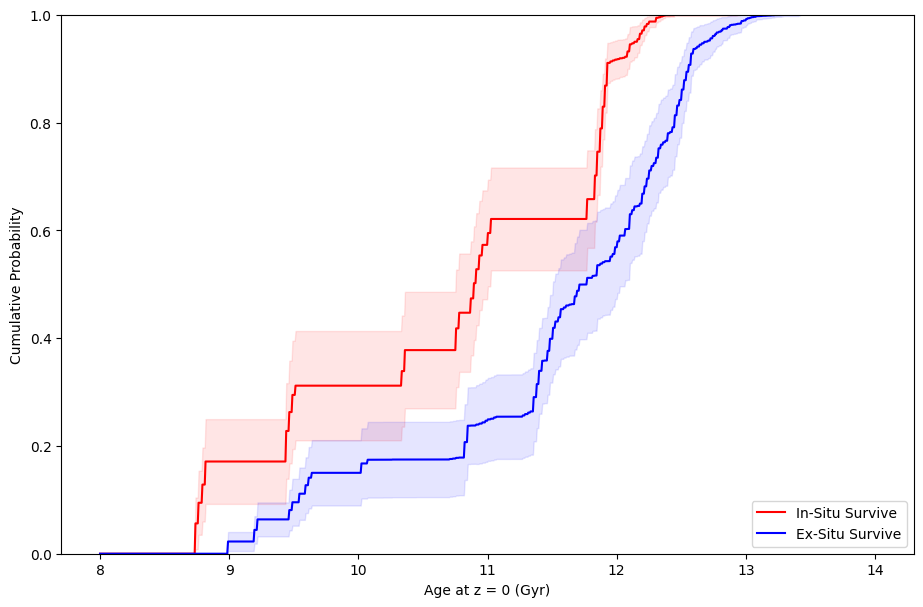

In [394]:
plt.figure(figsize=(11, 7))

plt_error = True

for plot_key in time_age_plot_dict.keys():
    grid = time_age_grid
    cdf = time_age_plot_dict[plot_key]["mean"]
    err = time_age_plot_dict[plot_key]["std"]

    plt.plot(
        grid,
        cdf,
        c=plt_set[plot_key]["c"],
        ls=plt_set[plot_key]["ls"],
        label=plt_set[plot_key]["label"],
    )

    if plt_error:
        plt.fill_between(
            time_age_grid,
            cdf - err,
            cdf + err,
            color=plt_set[plot_key]["c"],
            alpha=0.1,
        )


plt.xlabel("Age at z = 0 (Gyr)")
plt.ylabel("Cumulative Probability")

# plt.xscale("log")
# plt.xlim(5 * 10**3, 10**7)
plt.ylim(0, 1)
plt.legend(loc="lower right")

In [ ]:
# proc_data.close()
# mass_data.close()